In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.interpolate import griddata

<h2>Блок 1. Подготовка данных.</h2> 

In [4]:
df_speed = pd.read_csv('wind_speed.csv')
df_temperature = pd.read_csv('temperature.csv')
df_cities = pd.read_csv('city_attributes.csv')
df_wind_direction = pd.read_csv('wind_direction.csv')
df_weather_description = pd.read_csv('weather_description.csv')

In [5]:
df_temperature

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,...,290.240000,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,...,289.240000,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,...,286.780000,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,283.020000,NaN,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,...,284.570000,NaN,272.480000,282.170000,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_speed = df_speed.drop('datetime', axis=1)
df_wind_direction = df_wind_direction.drop('datetime', axis=1)
df = pd.concat([df_temperature, df_speed, df_wind_direction], axis=1)
df

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,360.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,270.0,260.0,230.0,60.0,135.0,101.0,30.0,336.0,336.0,329.0
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,270.0,260.0,230.0,60.0,157.0,315.0,30.0,336.0,336.0,329.0
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,271.0,260.0,231.0,60.0,157.0,307.0,30.0,336.0,336.0,329.0
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,272.0,260.0,233.0,60.0,157.0,294.0,30.0,336.0,336.0,329.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,...,290.0,NaN,300.0,290.0,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,...,290.0,NaN,300.0,340.0,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,...,320.0,NaN,290.0,340.0,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,283.020000,NaN,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,...,330.0,NaN,290.0,330.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['datetime', 'Vancouver', 'Portland', 'San Francisco', 'Seattle',
       'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque',
       ...
       'Philadelphia', 'New York', 'Montreal', 'Boston', 'Beersheba',
       'Tel Aviv District', 'Eilat', 'Haifa', 'Nahariyya', 'Jerusalem'],
      dtype='object', length=109)

In [8]:
df = df[df.isnull().sum(axis=1)==0].copy() # удаляем строки с пустотами 

In [9]:
df['mean_temperature'] = df.iloc[:, 1:37].mean(axis=1) # средняя температура в городах в данный момент времени 
df.columns

Index(['datetime', 'Vancouver', 'Portland', 'San Francisco', 'Seattle',
       'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque',
       ...
       'New York', 'Montreal', 'Boston', 'Beersheba', 'Tel Aviv District',
       'Eilat', 'Haifa', 'Nahariyya', 'Jerusalem', 'mean_temperature'],
      dtype='object', length=110)

In [10]:
df['mean_speed'] = df.iloc[:, 37:73].mean(axis=1) # средняя скорость ветра в городах в данных момент времени 
df['mean_speed']

1        2.222222
2        2.277778
3        2.222222
4        2.194444
5        2.138889
           ...   
44456    3.638889
44457    3.805556
44458    3.666667
44459    3.166667
44460    3.083333
Name: mean_speed, Length: 44386, dtype: float64

<hr>

<h2>Блок 2. Задания 1-3.</h2>

<h3>Задание 1. Постройте зависимость ветра от температуры. Рассчитайте, как изменяется скорость ветра при изменении температуры. Свяжите результат с прогнозом погоды</h3>

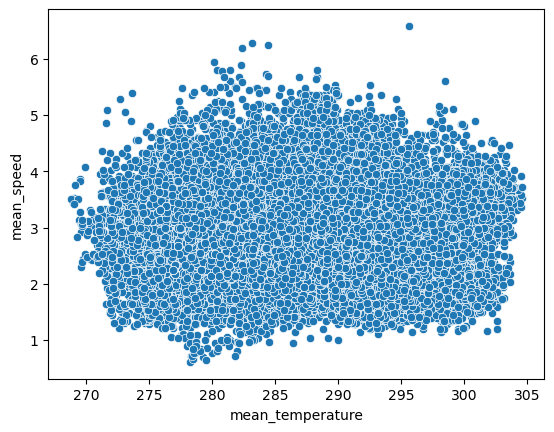

In [11]:
sns.scatterplot(data=df, x="mean_temperature", y="mean_speed")
plt.show()

In [12]:
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df['mean_temperature'], df['mean_speed']
)

print(f'Уравнение линейной регрессии: mean_speed = {slope} * mean_temperature + {intercept}', '\n' , 'R^2:', r_value**2)

Уравнение линейной регрессии: mean_speed = -0.010458895706621762 * mean_temperature + 5.8047715892231775 
 R^2: 0.011728601137770729


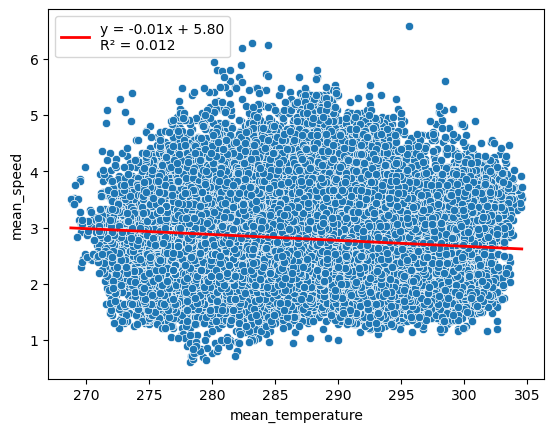

In [13]:
sns.scatterplot(data=df, x="mean_temperature", y="mean_speed") 

x_line = np.linspace(df['mean_temperature'].min(), df['mean_temperature'].max(), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='red', linewidth=2, 
         label=f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.3f}')

plt.legend()
plt.show()

Вывод: В среднем скорость ветра имеет прирост на 0.02 м/с при приросте температуры на 1 кельвин. На основе этого, можно сказать, что вероятность ветреной или ураганной погоды больше при высокой температуре. Но это общяя тенденция, которая не позволит сделать точных прогноз. 

<hr>

<h3>Задание 2. Рассчитайте градиент температуры по координатам (∂T/∂lat, ∂T/∂lon) для каждой точки. Какая польза от этого для прогнозов?</h3>


In [14]:
df

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,mean_temperature,mean_speed
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,230.0,60.0,135.0,101.0,30.0,336.0,336.0,329.0,291.149444,2.222222
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,230.0,60.0,157.0,315.0,30.0,336.0,336.0,329.0,291.127045,2.277778
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,231.0,60.0,157.0,307.0,30.0,336.0,336.0,329.0,291.148493,2.222222
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,233.0,60.0,157.0,294.0,30.0,336.0,336.0,329.0,291.168177,2.194444
5,2012-10-01 17:00:00,284.622911,282.109095,289.431869,281.775065,291.852162,291.563063,293.370249,296.677445,285.392738,...,234.0,61.0,157.0,282.0,30.0,336.0,336.0,329.0,291.187862,2.138889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44456,2017-10-27 20:00:00,286.440000,293.840000,297.060000,286.150000,299.990000,299.390000,298.430000,302.150000,284.370000,...,220.0,0.0,9.0,0.0,360.0,38.0,38.0,0.0,290.466500,3.638889
44457,2017-10-27 21:00:00,287.870000,294.850000,299.140000,288.140000,301.320000,299.700000,299.430000,303.650000,285.890000,...,210.0,0.0,9.0,0.0,340.0,38.0,38.0,0.0,290.520111,3.805556
44458,2017-10-27 22:00:00,288.420000,295.570000,300.560000,289.440000,301.600000,300.160000,300.560000,304.480000,286.400000,...,210.0,251.0,9.0,0.0,340.0,38.0,38.0,0.0,290.324833,3.666667
44459,2017-10-27 23:00:00,288.650000,294.990000,301.060000,290.590000,301.760000,300.770000,300.810000,304.950000,286.890000,...,130.0,0.0,23.0,150.0,340.0,69.0,69.0,150.0,289.560861,3.166667


In [15]:
mean_temperatures = df.iloc[:, 1:37].mean().reset_index(name='mean_temperature')['mean_temperature'].copy()

In [16]:
df_cities = pd.concat([df_cities, mean_temperatures], axis=1)
df_cities

,City,Country,Latitude,Longitude,mean_temperature
0,Vancouver,Canada,49.249660,-123.119339,283.862923
1,Portland,United States,45.523449,-122.676208,285.050325
2,San Francisco,United States,37.774929,-122.419418,288.156970
3,Seattle,United States,47.606209,-122.332069,284.474498
4,Los Angeles,United States,34.052231,-118.243683,290.841609
5,San Diego,United States,32.715328,-117.157257,290.215650
6,Las Vegas,United States,36.174969,-115.137222,292.477276
7,Phoenix,United States,33.448380,-112.074043,295.533662
8,Albuquerque,United States,35.084492,-106.651138,285.669888
9,Denver,United States,39.739151,-104.984703,282.892921


Выполняем интерполяцию функции температуры по известным точкам, так как нам нужно добиться непрерывности функции. 

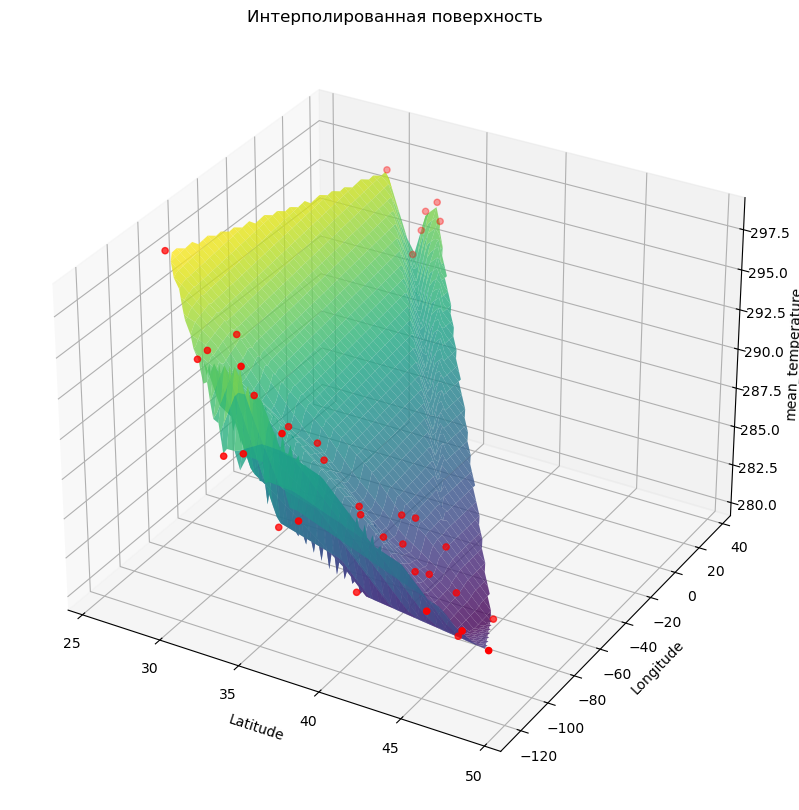

In [17]:
xi = np.linspace(df_cities['Latitude'].min(), df_cities['Latitude'].max(), 100)
yi = np.linspace(df_cities['Longitude'].min(), df_cities['Longitude'].max(), 100)
XI, YI = np.meshgrid(xi, yi)

ZI = griddata((df_cities['Latitude'], df_cities['Longitude']), df_cities['mean_temperature'], (XI, YI), method='linear')

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XI, YI, ZI, cmap='viridis', alpha=0.8)
ax.scatter(df_cities['Latitude'], df_cities['Longitude'], df_cities['mean_temperature'], color='red', s=20)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('mean_temperature')
ax.set_title('Интерполированная поверхность')
plt.show()

Вычисляем градиент для каждой известной точки. 

In [18]:
grad_y, grad_x = np.gradient(ZI, yi, xi)  

gradients = []
for i, row in df_cities.iterrows():
    lat, lon = row['Latitude'], row['Longitude']
    
    lat_idx = np.argmin(np.abs(xi - lat))
    lon_idx = np.argmin(np.abs(yi - lon))
    
    grad_lat = grad_x[lon_idx, lat_idx] 
    grad_lon = grad_y[lon_idx, lat_idx]   
    
    gradients.append({
        'grad_latitude': grad_lat,
        'grad_longitude': grad_lon,
        'grad_module': np.sqrt(grad_lat**2 + grad_lon**2),
    })

df_cities_with_gradients = pd.concat([df_cities, pd.DataFrame(gradients)], axis=1)
df_cities_with_gradients

,City,Country,Latitude,Longitude,mean_temperature,grad_latitude,grad_longitude,grad_module
0,Vancouver,Canada,49.249660,-123.119339,283.862923,NaN,NaN,NaN
1,Portland,United States,45.523449,-122.676208,285.050325,NaN,NaN,NaN
2,San Francisco,United States,37.774929,-122.419418,288.156970,NaN,NaN,NaN
3,Seattle,United States,47.606209,-122.332069,284.474498,NaN,NaN,NaN
4,Los Angeles,United States,34.052231,-118.243683,290.841609,2.130467,NaN,NaN
5,San Diego,United States,32.715328,-117.157257,290.215650,NaN,NaN,NaN
6,Las Vegas,United States,36.174969,-115.137222,292.477276,-0.632904,-0.140339,0.648277
7,Phoenix,United States,33.448380,-112.074043,295.533662,0.500143,0.020848,0.500577
8,Albuquerque,United States,35.084492,-106.651138,285.669888,-2.021603,-0.569978,2.100418
9,Denver,United States,39.739151,-104.984703,282.892921,-1.006637,-0.282293,1.045469


В некоторых точках градиент функции неопределен, что связано с методами линейной интерполяции и вычисления производной.  np.gradient для граничных точек вычисляет частные производные по определению через предел преращения lim(f(x+delta)-f(x)/delta), но f(x+delta) будет неопределена, поэтому в конечном итоге будет NaN. 

<h3>Какая польза от этого для прогнозов?</h3>

<ul>
    <li>
        <p>Создание "температурной карты" описывает зависимость степени нагрева Земной поверхности солнцем от расположения на поверхности</p>
    </li>
    <li>
        <p>Направление градиента может показывать, траекторию движения теплых воздушных масс</p>
    </li>
    <li>
        <p>
            Модуль градиента может помочь индентифицировать положение атмосферного фронта - точки, где пересекаются теплые и холодные воздушные массы
        </p>
    </li>
</ul>


<hr>
<h3>
    Задание 3. Перейдите к сферическим координатам (радиус ≈ земной радиус, θ = широта, φ = долгота) и пересчитайте компоненты ветра в этих координатах. Сравните два представления информации
</h3>

In [19]:
df[:10].to_csv('file.csv')

In [20]:
df.iloc[:, 37:73]

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,...,4.0,7.0,4.0,3.0,1.0,0.0,8.0,2.0,2.0,2.0
2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,...,4.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
3,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,3.0,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
4,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,3.0,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,3.0,...,3.0,6.0,3.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44456,2.0,6.0,0.0,2.0,0.0,3.0,2.0,2.0,1.0,1.0,...,4.0,3.0,4.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0
44457,2.0,8.0,2.0,3.0,1.0,3.0,2.0,2.0,1.0,2.0,...,4.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,3.0,1.0
44458,4.0,8.0,2.0,1.0,2.0,3.0,2.0,2.0,1.0,2.0,...,3.0,2.0,2.0,2.0,1.0,1.0,5.0,3.0,3.0,1.0
44459,0.0,6.0,2.0,3.0,2.0,4.0,2.0,2.0,1.0,1.0,...,2.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0


Определим вспомогательные функции для пересчёта линейных компонент скорости ветра в сферических (угловая скорость):

In [39]:
def dec_wind_components(angle, speed):
    
    angle = angle - 90 
    speed_x = speed * np.cos(angle)
    speed_y = speed * np.sin(angle)
    
    return [speed_x, speed_y]
    
def sphere_wind_components(angle, speed, latitude, longitude, R = 6371000):
    
    latitude_rad = np.radians(latitude)
    
    speed_x = dec_wind_components(angle, speed)[0]
    speed_y = dec_wind_components(angle, speed)[1]
    
    w_lat = speed_y / R
    w_long = speed_x / (R * np.cos(latitude_rad))
    
    return w_lat, w_long


1.0 0.0
